In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy.stats import norm



In [10]:
df = pd.read_csv("../../static/transaction_ut.csv")

In [11]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,connection,enrich,transactionDate,postDate,subClass,links
0,transaction,4957bcf6-f18f-43d7-94df-71f44a0bcf32,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,d3de1ca1,22109.56,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:07:36,NaN,"{""account"":""https://au-api.basiq.io/users/6a52..."
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b..."
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,3/08/2023,2023-08-03T00:00:00Z,"{\title\"":\""\""","\""code\"":\""card\""}"""
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,29/07/2023,2023-07-29T00:00:00Z,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,26/12/2021,2021-12-16T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,14/12/2021,2021-12-14T00:00:00Z,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}"""
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,13/12/2021,2021-12-13T00:00:00Z,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}"""
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,1bd6c08e-8457-4a74-bdd9-514df489d27e,NaN,10/12/2021,2021-12-10T00:00:00Z,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}"""


In [12]:
df = df.sort_values(by="postDate")
# Remove the "Z" from the datetime strings
df["postDate"] = df["postDate"].str.replace("Z", "")

# Convert to datetime with the correct format
df["postDate"] = pd.to_datetime(df["postDate"], format="%Y-%m-%dT%H:%M:%S")

# Extract Year, Month, Day, Hour, Minute, and Second
df["Year"] = df["postDate"].dt.year
df["Month"] = df["postDate"].dt.month
df["Day"] = df["postDate"].dt.day
df["Hour"] = df["postDate"].dt.hour
df["Minute"] = df["postDate"].dt.minute
df["Second"] = df["postDate"].dt.second

In [13]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,...,transactionDate,postDate,subClass,links,Year,Month,Day,Hour,Minute,Second
288,transaction,312885c2-6ff6-4d96-89c9-0bf1b2987f46,posted,AGL RETAIL ENERGY LTD (GAS),-92.0,070c1d68-0ee0-477a-9679-294ea7059939,-99.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,...,13/12/2021,2021-12-13 00:00:00,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}""",2021,12,13,0,0,0
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,...,14/12/2021,2021-12-14 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,14,0,0,0
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,...,26/12/2021,2021-12-16 00:00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,...,29/07/2023,2023-07-29 00:00:00,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}""",2023,7,29,0,0,0
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,...,3/08/2023,2023-08-03 00:00:00,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b...",2023,8,3,0,0,0
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0


In [14]:
columns_to_keep = ["postDate", "balance"]
df = df[columns_to_keep]
df['postDate'] = pd.to_datetime(df['postDate']).dt.date
df = df.groupby('postDate').agg({'balance': 'min'}).reset_index()

C:\Users\gaya3\AppData\Local\Temp\ipykernel_37828\2051230037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postDate'] = pd.to_datetime(df['postDate']).dt.date


In [15]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-13,-759.34
2,2021-12-14,-558.34
3,2021-12-16,-357.34
4,2021-12-26,-759.84
...,...,...
158,2023-07-16,18474.06
159,2023-07-17,18675.06
160,2023-07-28,26367.06
161,2023-07-29,22514.56


In [16]:
# Save the DataFrame to a new CSV file if needed
df.to_csv('modified_transactions_data.csv', index=False)

In [17]:
df['postDate'] = pd.to_datetime(df['postDate'])
df.set_index('postDate', inplace=True)

# Then, resample the DataFrame with daily frequency and forward-fill missing values
df = df.resample('D').ffill()

# Reset the index to have 'postDate' as a regular column again
df.reset_index(inplace=True)

In [18]:
df

,postDate,balance
0,2021-12-10,-259.34
1,2021-12-11,-259.34
2,2021-12-12,-259.34
3,2021-12-13,-759.34
4,2021-12-14,-558.34
...,...,...
597,2023-07-30,22514.56
598,2023-07-31,22514.56
599,2023-08-01,22514.56
600,2023-08-02,22514.56


<Axes: >

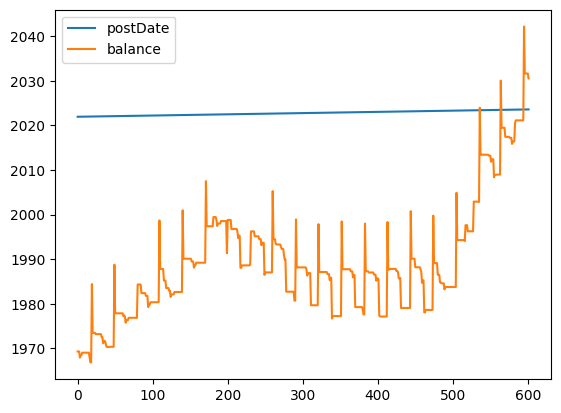

In [19]:
df.plot()

In [20]:
df.set_index('postDate', inplace=True)

train_size = int(len(df) * 0.8)
train_data = df['balance'][:train_size]
test_data = df['balance'][train_size:]

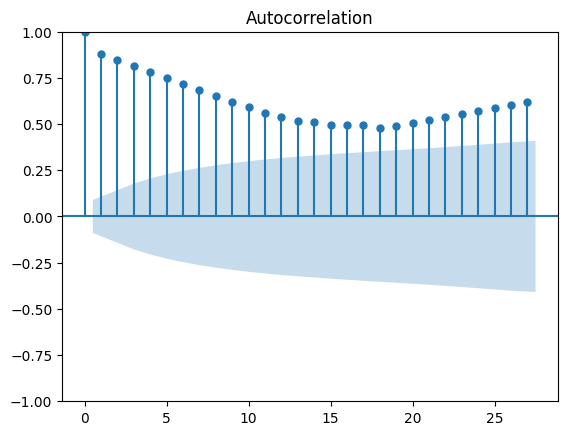

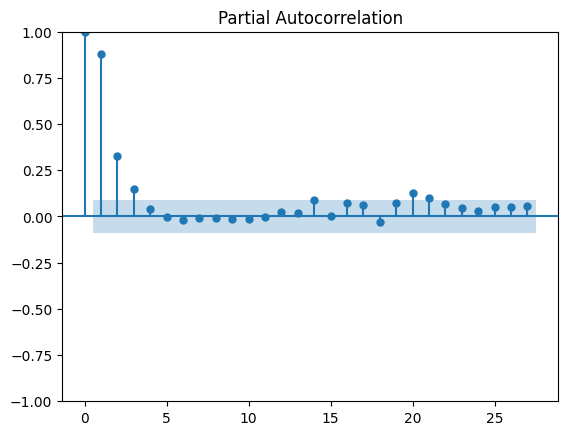

In [21]:
#inserted
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train_data)
pacf_original = plot_pacf(train_data)

In [58]:
#inserted
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train_data)
print(f'p-value: {adf_test[1]}')

p-value: 0.009081597283628335


<Axes: xlabel='postDate'>

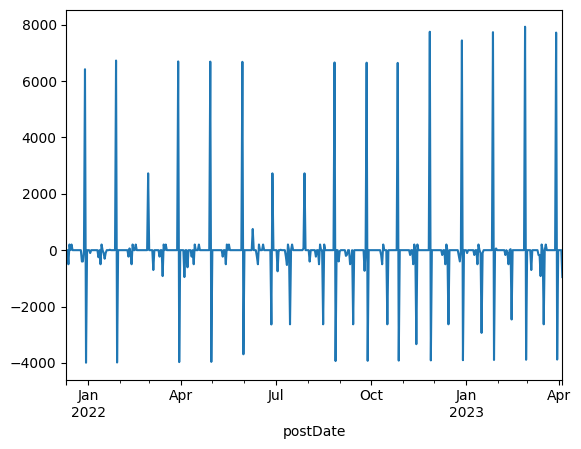

In [59]:
df_train_diff = train_data.diff().dropna()
df_train_diff.plot()

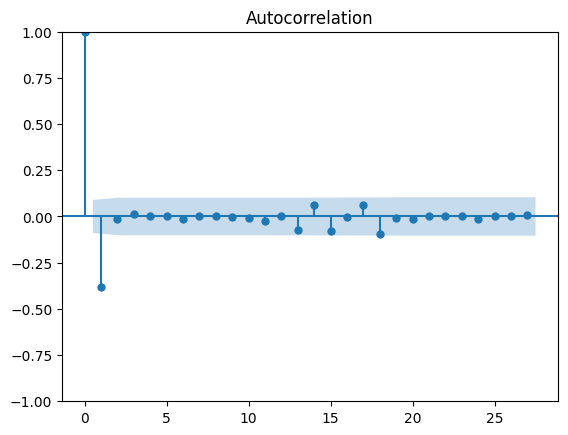

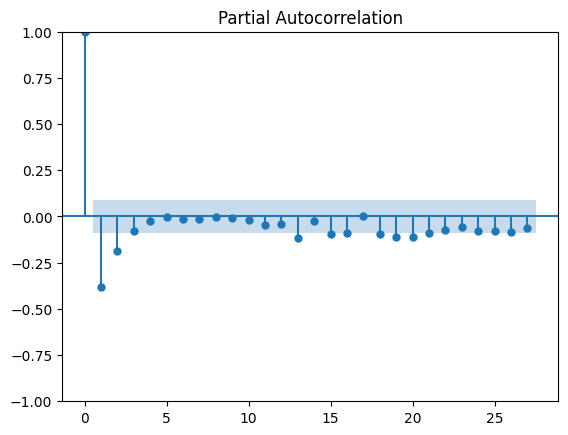

In [60]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [184]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [231]:
p = 0  # Autoregressive order
d = 2  # Integrated order (differencing)
q = 2 # Moving Average order

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
import statsmodels.api as sm


for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))       

c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12572.491002728097
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11997.955411560339
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10987.645618404607


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10676.173996656391
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11006.013630099322


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10855.345978303463
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10649.898411838021


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10633.91667475267
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11903.90321792215


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11323.680401045349


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10728.782292086808


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:10388.856467037856


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10764.629480163123


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:10582.631735414405


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10410.55141017474


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10371.913585912302
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10444.83121564837
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10249.516116486779
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:10627.56030853073


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:10111.97148589187
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:10265.937253158238


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:10250.58219906457
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:10271.267006404814


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:10093.156053552695
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:10311.045526458714
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:10117.656015661027


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:10521.736214885459


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:9930.292734995393
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:10150.106252396286


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:10119.022158626536


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:10168.798688416453


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:9931.233079538479
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:10461.511633145614
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:10266.21347298285


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:10558.600050056146


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:10069.581976690044
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:10266.219179747073


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:10267.660433387962


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:10191.509290743514


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:10071.039997121301
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:10328.827557824861


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:10135.206251661002
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:10506.280735904995


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:10041.25579023037
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:10151.461557979332


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10136.574916199224


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:10144.296739000436


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:9951.847394687315
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:10351.762921597618


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:10158.379189210153
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:10554.992677065013


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:9968.754606370401
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:10158.385064897557


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:10159.54152348822


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:10171.900640988655


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:9970.340329867795
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:10313.043989705817


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:10119.656324181338


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:10523.671299039292


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:9932.285093088321
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:10135.895395989875


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10121.019818711638


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:10154.156136364994


c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:9933.230103389062


In [25]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gaya3\Dolfin\new\Neo_Dolfin\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4775      0.081     -5.926      0.000      -0.635      -0.320
ar.S.L12      -0.0825      0.073     -1.128      0.259      -0.226       0.061
ma.S.L12      -1.0285      0.074    -13.969      0.000      -1.173      -0.884
sigma2      1.603e+06   1.58e+05     10.178      0.000    1.29e+06    1.91e+06


In [35]:
import datetime
current = datetime.date.today() 
start= current - datetime.timedelta(days=180)
end = current + datetime.timedelta(days=180)
print(start)
print(end)

2023-03-16
2024-03-10


In [36]:
pred = results.get_prediction(start=pd.to_datetime(start), end=pd.to_datetime(end),dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
print(pred.predicted_mean)

            lower balance  upper balance
2023-03-16    3323.239657    8445.282203
2023-03-17    2939.217899    8061.259857
2023-03-18    1637.882244    6759.924068
2023-03-19    1333.466199    6455.507993
2023-03-20     845.315223    5967.357010
...                   ...            ...
2024-03-06  -22922.211475   43421.109094
2024-03-07  -23256.717625   43247.409183
2024-03-08  -23088.131980   43576.725159
2024-03-09  -23151.570931   43673.631178
2024-03-10  -23133.617898   43851.545596

[361 rows x 2 columns]
2023-03-16     5884.260930
2023-03-17     5500.238878
2023-03-18     4198.903156
2023-03-19     3894.487096
2023-03-20     3406.336117
                  ...     
2024-03-06    10249.448810
2024-03-07     9995.345779
2024-03-08    10244.296589
2024-03-09    10261.030123
2024-03-10    10358.963849
Freq: D, Name: predicted_mean, Length: 361, dtype: float64


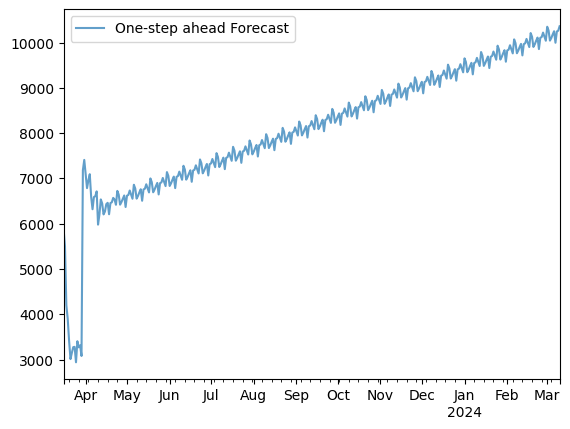

In [39]:
pred.predicted_mean.plot( label='One-step ahead Forecast', alpha=.7)

plt.legend()

plt.show()

In [50]:
df_forecasted = pred.predicted_mean
df_truth = df['2023-03-07':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2023-03-07 00:00:00   NaN
2023-03-08 00:00:00   NaN
2023-03-09 00:00:00   NaN
2023-03-10 00:00:00   NaN
2023-03-11 00:00:00   NaN
2023-03-12 00:00:00   NaN
2023-03-13 00:00:00   NaN
2023-03-14 00:00:00   NaN
2023-03-15 00:00:00   NaN
2023-03-16 00:00:00   NaN
2023-03-17 00:00:00   NaN
2023-03-18 00:00:00   NaN
2023-03-19 00:00:00   NaN
2023-03-20 00:00:00   NaN
2023-03-21 00:00:00   NaN
2023-03-22 00:00:00   NaN
2023-03-23 00:00:00   NaN
2023-03-24 00:00:00   NaN
2023-03-25 00:00:00   NaN
2023-03-26 00:00:00   NaN
2023-03-27 00:00:00   NaN
2023-03-28 00:00:00   NaN
2023-03-29 00:00:00   NaN
2023-03-30 00:00:00   NaN
2023-03-31 00:00:00   NaN
2023-04-01 00:00:00   NaN
2023-04-02 00:00:00   NaN
2023-04-03 00:00:00   NaN
2023-04-04 00:00:00   NaN
balance               NaN
dtype: float64


In [233]:
# Define the number of months to forecast ahead
forecast_months = 365
forecast = model_fit.forecast(forecast_months)

# Create an index for the forecasted days
forecast_index = pd.date_range(start=df.index[0], periods=forecast_months, freq='D')

In [234]:
print("Forecasted Balances for the Next 12 Months:")
print(forecast)


Forecasted Balances for the Next 12 Months:
2023-04-05     6504.802265
2023-04-06     6518.691245
2023-04-07     6532.580225
2023-04-08     6546.469205
2023-04-09     6560.358185
                  ...     
2024-03-30    11504.835065
2024-03-31    11518.724045
2024-04-01    11532.613025
2024-04-02    11546.502005
2024-04-03    11560.390985
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [235]:
# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the z-score for the desired confidence level
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate the standard error of the mean (assuming normal distribution)
std_error = np.std(forecast) / np.sqrt(len(forecast))

# Calculate the margin of error
margin_of_error = z_score * std_error

# Calculate the lower and upper bounds for the confidence intervals
lower_bound = forecast - margin_of_error
upper_bound = forecast + margin_of_error

# Create a DataFrame with the forecasted values and their confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Print the DataFrame
print(forecast_df)
#inserted
print(std_error)

                Forecast   Lower Bound   Upper Bound
2023-04-05   6504.802265   6354.670488   6654.934041
2023-04-06   6518.691245   6368.559468   6668.823021
2023-04-07   6532.580225   6382.448448   6682.712001
2023-04-08   6546.469205   6396.337428   6696.600981
2023-04-09   6560.358185   6410.226408   6710.489961
...                  ...           ...           ...
2024-03-30  11504.835065  11354.703289  11654.966841
2024-03-31  11518.724045  11368.592269  11668.855821
2024-04-01  11532.613025  11382.481249  11682.744801
2024-04-02  11546.502005  11396.370229  11696.633781
2024-04-03  11560.390985  11410.259209  11710.522761

[365 rows x 3 columns]
76.59925254728597


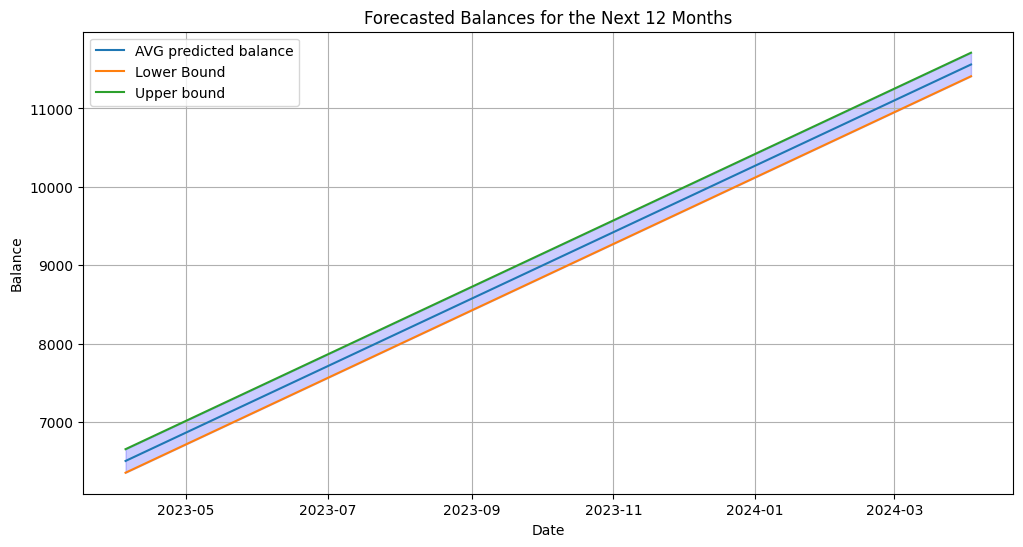

In [236]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df, label='Forecasted Balances')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'], alpha=0.2, color='b')
plt.title('Forecasted Balances for the Next 12 Months')
plt.legend(['AVG predicted balance','Lower Bound','Upper bound'])
plt.grid(True)
plt.show()